In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import convolve2d

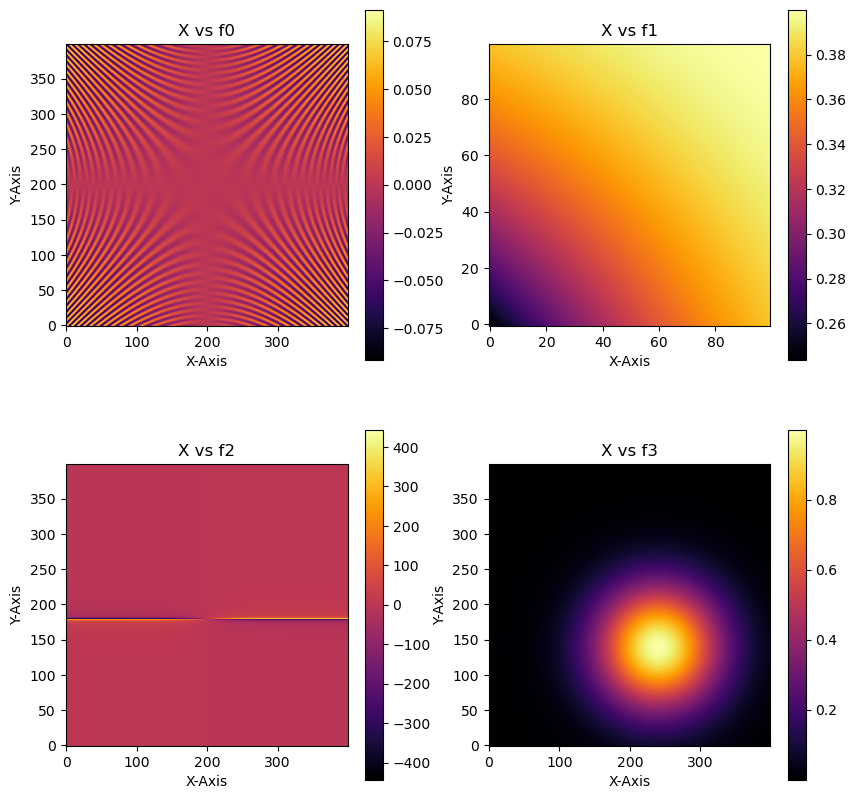

In [74]:
# 1

x = np.linspace(-1, 1, 400)
y = x
x, y = np.meshgrid(x,y)

x1 = np.linspace(0.2, 0.424, 100)
y1 = x1
x1, y1 = np.meshgrid(x1,y1)

def f0(x, y):
    return (np.sin(x*y)*np.sin(1-((9*x)**2) + ((9*y)**2)))/9
f0 = f0(x,y)

def f1(x, y):
    return ((0.4**2)-(0.6-(((x1**2) + (y1**2))**0.5))**2)**0.5
f1 = f1(x,y)

def f2(x, y):
    return np.tanh(5*x)/(y+0.1)
f2 = f2(x,y)

def f3(x, y):
    return np.e**(-5*((x-0.2)**2 + (y+0.3)**2))
f3 = f3(x,y)

fig, [[ax0, ax1],[ax2, ax3]] = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
a= ax0.imshow(f0, cmap='inferno', origin='lower')
ax0.set_xlabel('X-Axis')
ax0.set_ylabel('Y-Axis')
ax0.set_title('X vs f0')

b = ax1.imshow(f1, cmap='inferno', origin='lower')
ax1.set_xlabel('X-Axis')
ax1.set_ylabel('Y-Axis')
ax1.set_title('X vs f1')

c = ax2.imshow(f2, cmap='inferno', origin='lower')
ax2.set_xlabel('X-Axis')
ax2.set_ylabel('Y-Axis')
ax2.set_title('X vs f2')

d = ax3.imshow(f3, cmap='inferno', origin='lower')
ax3.set_xlabel('X-Axis')
ax3.set_ylabel('Y-Axis')
ax3.set_title('X vs f3')

plt.colorbar(a)
plt.colorbar(b)
plt.colorbar(c)
plt.colorbar(d)

plt.show()

In [30]:
# What we are seeing for the top left are some outlines of hyperbolic curves. 
#The top right shows an outward dillution of the color and a darker tone closer to the origin. 
#The bottom left shows an extremity at a specific line value, and the bottom right shows a dark max everywhere except the circle shown.

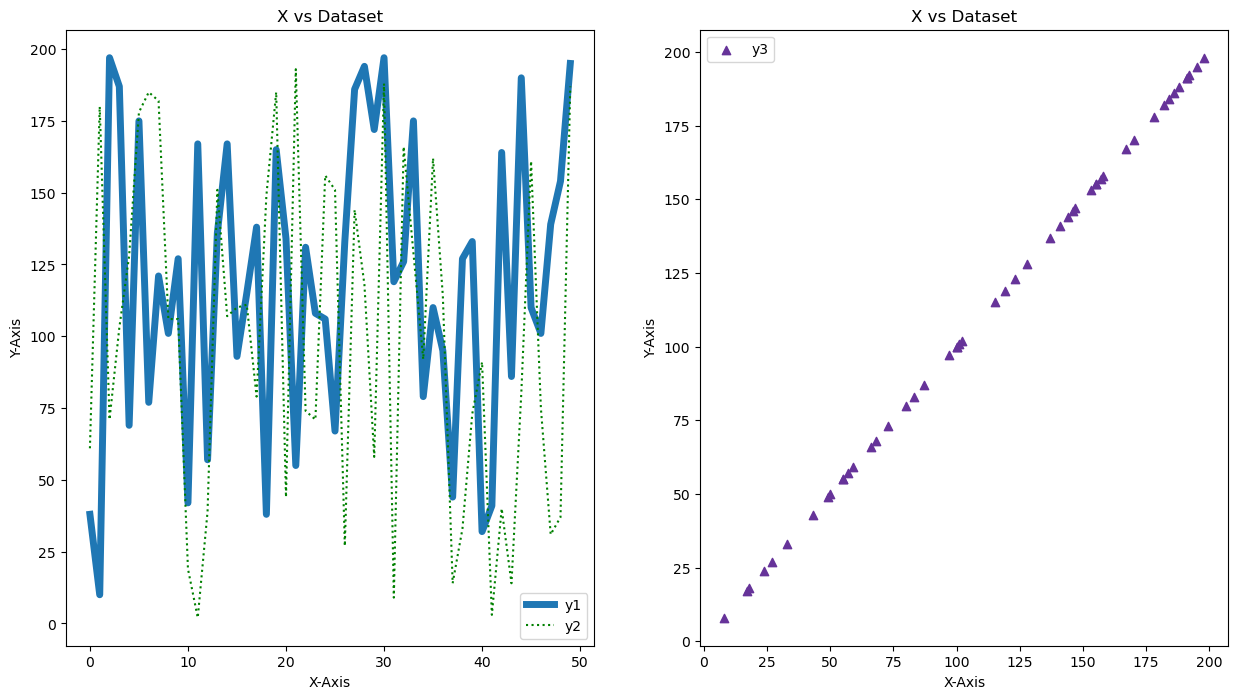

In [3]:
#2

x=np.arange(0,50)
y1 = np.random.randint(0, 200, 50)
y2 = np.random.randint(0, 200, 50)
y3 = np.random.randint(0, 200, 50)

fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15,8))
axes1.plot(x, y1, linewidth=5, label='y1')
axes1.plot(x, y2, color='green', linestyle=':', label='y2')
axes1.set_title('X vs Dataset')
axes1.set_xlabel('X-Axis')
axes1.set_ylabel('Y-Axis')
axes1.legend()
axes2.scatter(y3, y3, color='rebeccapurple', marker='^', label='y3')
axes2.set_title('X vs Dataset')
axes2.set_xlabel('X-Axis')
axes2.set_ylabel('Y-Axis')
axes2.legend()
plt.show()

In [75]:
#3

def find_pi(N):

    circle_x = np.random.rand(N)
    circle_y = np.random.rand(N)

    distances = ((circle_x)**2 + (circle_y)**2)**0.5

    quarter_points = []
    x_points = []
    y_points = []
    for i in range(0, len(distances)):
        if distances[i] <= 1:
            quarter_points.append(distances[i])
            x_points.append(circle_x[i])
            y_points.append(circle_y[i])

    quarter_circle = np.array(quarter_points)
    x_array = np.array(x_points)
    y_array = np.array(y_points)

    pi = (len(quarter_circle)/len(distances))*4
    return pi, quarter_circle, circle_x, circle_y, x_array, y_array

pi_values = [find_pi(10)[0], find_pi(10**3)[0], find_pi(10**4)[0], find_pi(10**5)[0], find_pi(10**6)[0]]
pi_values

[2.8, 3.172, 3.1732, 3.14072, 3.141496]

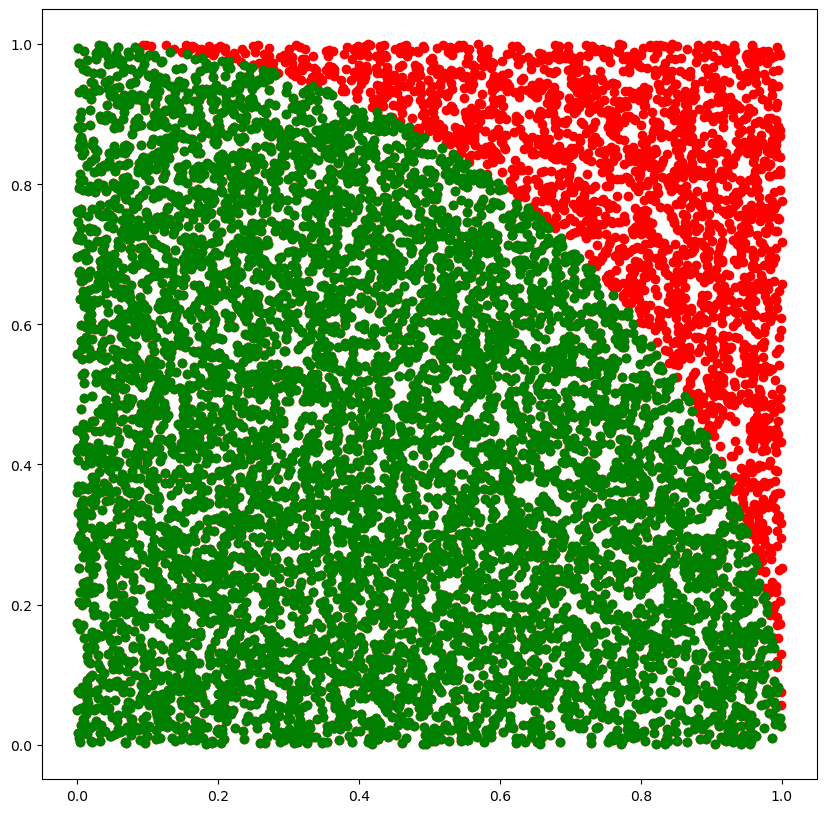

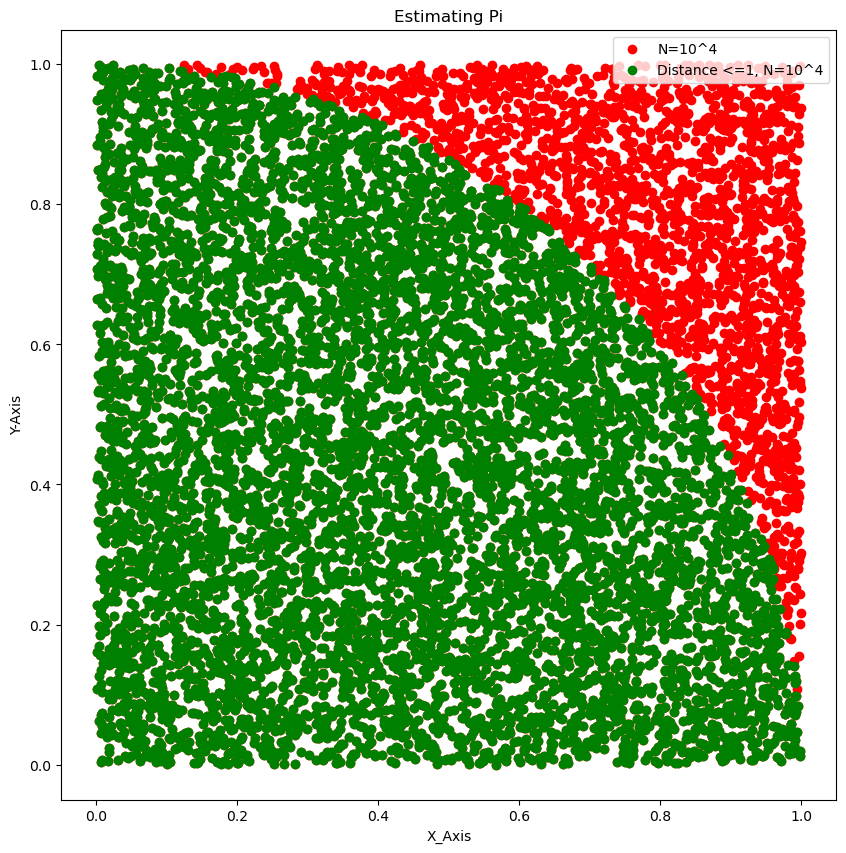

In [80]:
p = find_pi(10**4)

plt.figure(figsize=(10,10))
plt.scatter(p[2], p[3], color='red', label='N=10^4')
plt.scatter(p[4], p[5], color='green', label='Distance <=1, N=10^4')
plt.xlabel('X_Axis')
plt.ylabel('Y-Axis')
plt.title('Estimating Pi')
plt.legend()
plt.show()

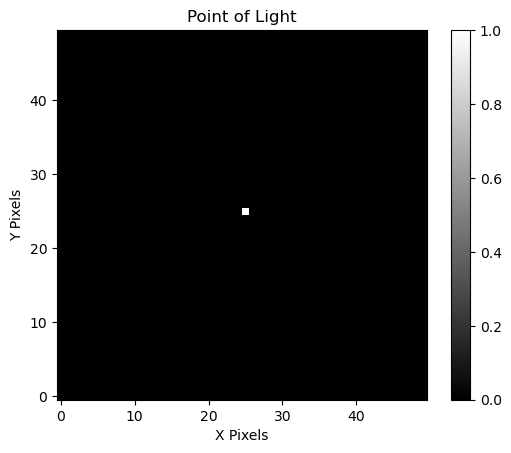

In [60]:
#3

x_new = np.linspace(0, 50)
y_new = x_new
x_new, y_new = np.meshgrid(x_new, y_new)

darkness = np.zeros((50,50))
darkness[25,25] = 1

plt.figure()
plt.imshow(darkness, cmap='gist_gray', origin='lower')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title('Point of Light')
plt.colorbar()
plt.show()

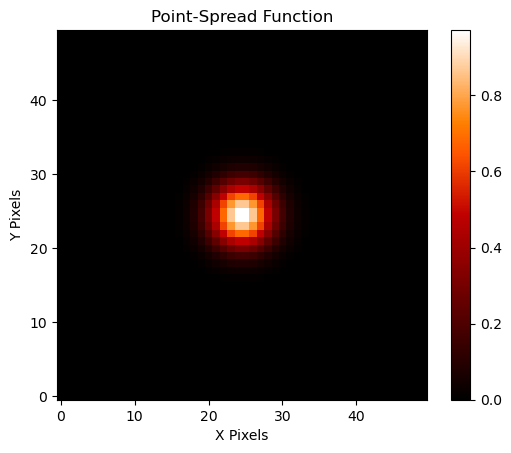

In [61]:
def PSF(x, y, A, sigma, x0, y0):
    return A * np.exp(-((x-x0)**2 / (2*sigma**2)) - ((y-y0)**2/ (2*sigma**2)))
    #return A*np.e**(-1*(((x-x0)**2)+((y-y0)**2))/(2*(sig**2)))

p = PSF(x_new, y_new, 1, 3, 25, 25)

plt.figure()
plt.imshow(p, cmap='gist_heat', origin='lower')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title('Point-Spread Function')
plt.colorbar()
plt.show()

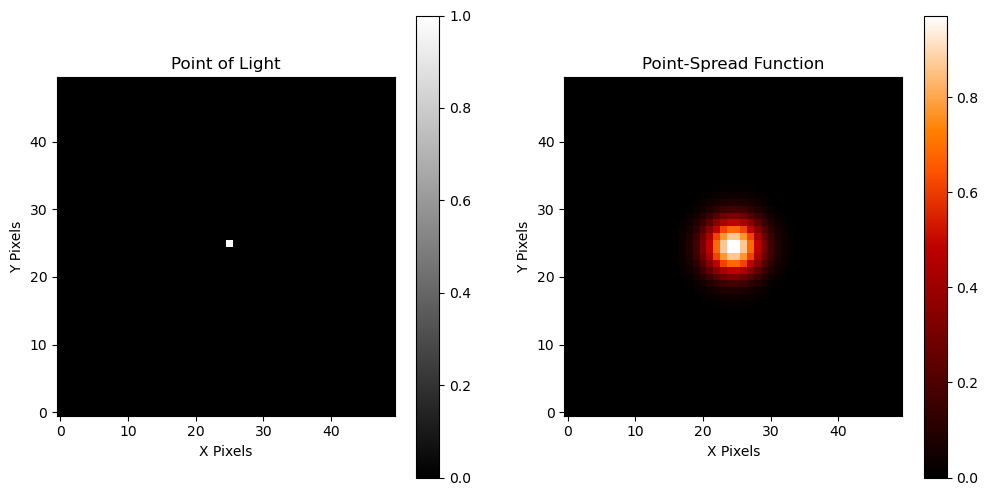

In [71]:
fig, (axe1, axe2) = plt.subplots(1,2, figsize=(12,6))

j=axe1.imshow(darkness, cmap='gist_gray', origin='lower')
axe1.set_xlabel('X Pixels')
axe1.set_ylabel('Y Pixels')
axe1.set_title('Point of Light')
i=axe2.imshow(p, cmap='gist_heat', origin='lower')
axe2.set_xlabel('X Pixels')
axe2.set_ylabel('Y Pixels')
axe2.set_title('Point-Spread Function')

plt.colorbar(i)
plt.colorbar(j)

plt.show()